In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import math

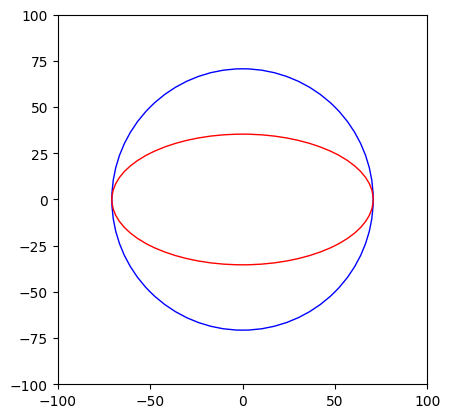

In [102]:
plt.figure()
ax = plt.gca()

# problem parameters
a1 = 1
a2 = 1
gamma1 = 1
gamma2 = 1
beta1 = 1
beta2 = 1
delta1 = 1
delta2 = 4
Re1 = 1
Re2 = 1
# z-axis
Re = 10000.4
# plot axes scaling
SCALE = math.sqrt(Re)

# ellipse parameters
# first ellipse
width1 = math.sqrt(2 * a1 * (Re - Re1) / delta1)
height1 = math.sqrt(2 * a1 * (Re - Re1) / beta1)
# second ellipse
width2 = math.sqrt(2 * a2 * (Re - Re2) / beta2)
height2 = math.sqrt(2 * a2 * (Re - Re2) / delta2)

ellipse1 = Ellipse(
    xy = (0,0),
    width=width1,
    height=height1,
    fc='None',
    edgecolor='b',
)

ellipse2 = Ellipse(
    xy = (0,0),
    width=width2,
    height=height2,
    fc='None',
    edgecolor='r',
)


ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
ax.set_xlim(-SCALE, SCALE)
ax.set_ylim(-SCALE, SCALE)
ax.set_aspect('equal', 'box')
plt.show()

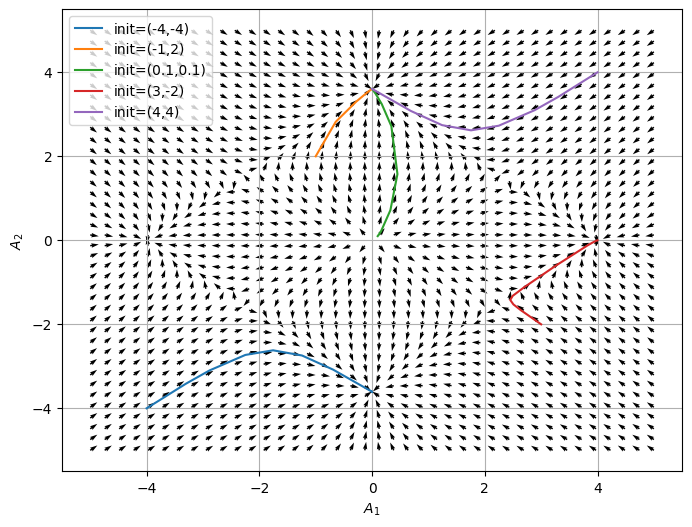

In [ ]:
from scipy.integrate import solve_ivp


a1 = 1
a2 = 1
Re = 18
Re1 = 10
Re2 = 5

gamma1 = 2 * a1 * (Re - Re1)
gamma2 = 2 * a2 * (Re - Re2)

beta1 = 5
beta2 = 4

delta1 = 1
delta2 = 2
def system(t, y):
    A1, A2 = y
    dA1_dt = gamma1 * A1 - delta1 * A1**3 - beta1 * A1 * A2**2
    dA2_dt = gamma2 * A2 - delta2 * A2**3 - beta2 * A2 * A1**2
    return [dA1_dt, dA2_dt]

A1_vals = np.linspace(-5, 5, 40)
A2_vals = np.linspace(-5, 5, 40)
A1, A2 = np.meshgrid(A1_vals, A2_vals)

U = gamma1 * A1 - delta1 * A1**3 - beta1 * A1 * A2**2
V = gamma2 * A2 - delta2 * A2**3 - beta2 * A2 * A1**2

N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N

plt.figure(figsize=(8, 6))
plt.quiver(A1, A2, U_norm, V_norm, angles='xy')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')

initial_conditions = [(-4, -4), (-1, 2), (0.1, 0.1), (3, -2), (4, 4)]
for A1_0, A2_0 in initial_conditions:
    sol = solve_ivp(system, [0, 20], [A1_0, A2_0], dense_output=True)
    plt.plot(sol.y[0], sol.y[1], label=f'init=({A1_0},{A2_0})')

plt.legend()
plt.grid()
plt.show()